In [9]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from ai4mat.data.data import read_structures_descriptions

In [12]:
materials = ("BP", "hBN", "InSe", "GaSe")
occu_tols = (0.1, 0.05, 1e-8)
datasets = dict()
for occu_tol in occu_tols:
    datasets[occu_tol] = pd.concat([read_structures_descriptions(f"../datasets/csv_cif/high_density_defects/{material}_spin_500_occu_tol_{occu_tol}") for material in materials], axis=0)

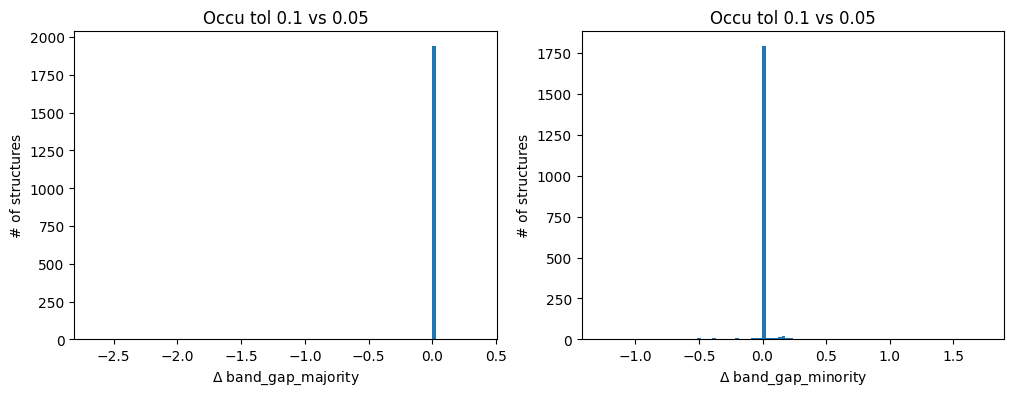

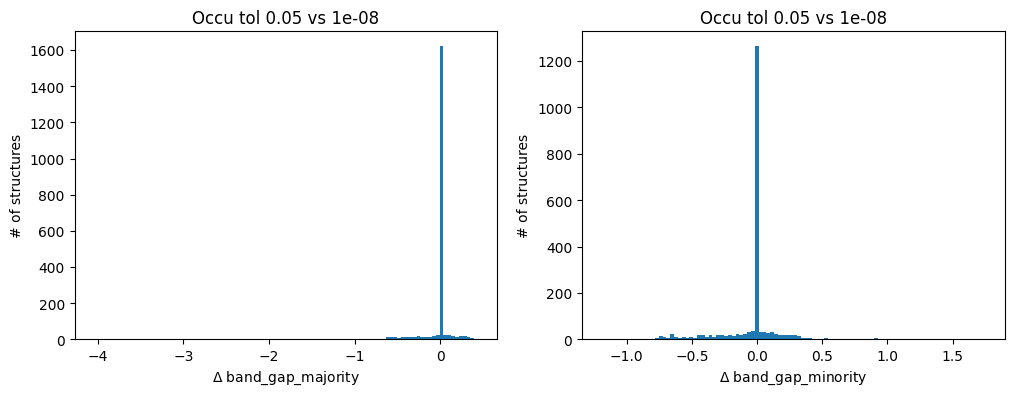

In [30]:
variables = ("band_gap_majority", "band_gap_minority")
for occ_one, occ_two in zip(occu_tols[:-1], occu_tols[1:]):
    fig, axes = plt.subplots(1, len(variables), figsize=(12, 4))
    for ax, variable in zip(axes, variables):
        ax.set_title(f"Occu tol {occ_one} vs {occ_two}")
        ax.hist(datasets[occ_one][variable] - datasets[occ_two][variable], bins=100)
        ax.set_xlabel(f"$\Delta$ {variable}")
        ax.set_ylabel("# of structures")